# **TERM DEPOSIT SUBSCRIPTION PREDICTION AND ANALYSIS**

In [577]:
#Used in Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

**Importing data manipulation and EDA libraries**

In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from time import time

In [579]:
#!pip install imblearn

In [580]:
#!pip install xgboost

**Importing Machine Learning and pipeline for model execution libraries**

In [581]:
#Importing libraries for Tranforming features
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
#Imorting libraries of Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
#Importing libraries for Evaluation
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#Importing libraries for Saving and Loading built model
import joblib

**Importing Dataset**

In [582]:
df= pd.read_csv("train.csv")

**Displaying First 5 rows for sample view**

In [583]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


In [584]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 33908
Number of Columns 17


**Check the dataframe for any missing data**

In [585]:
missing_values = []
columns = df.columns.to_list()
for column in columns:
    null_values = df[column].isnull().sum()
    missing_values.append([column, null_values])
pd.DataFrame(missing_values, columns=["Column Name", "Count of missing Values"]).set_index("Column Name").rename_axis("Column Name")

,Count of missing Values
Column Name,
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


**Getting a quick description of data like attribute types,No. of non null values,No. of Rows and Columns**

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
 16  y          33908 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


**Extracting Categorical columns name and storing it as list in a variable**

In [587]:
Catogrical_Features=df.select_dtypes("object").columns
Catogrical_Features=Catogrical_Features.drop("y")
Catogrical_Features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

**Extracting Numerical columns name using describe as it shows only numerical columns description by default**

In [588]:
Numerical_Features=df.describe().columns
Numerical_Features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

**Basic stats of numerical data**

In [589]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Histogram plot of all numeric varables for better visualization**

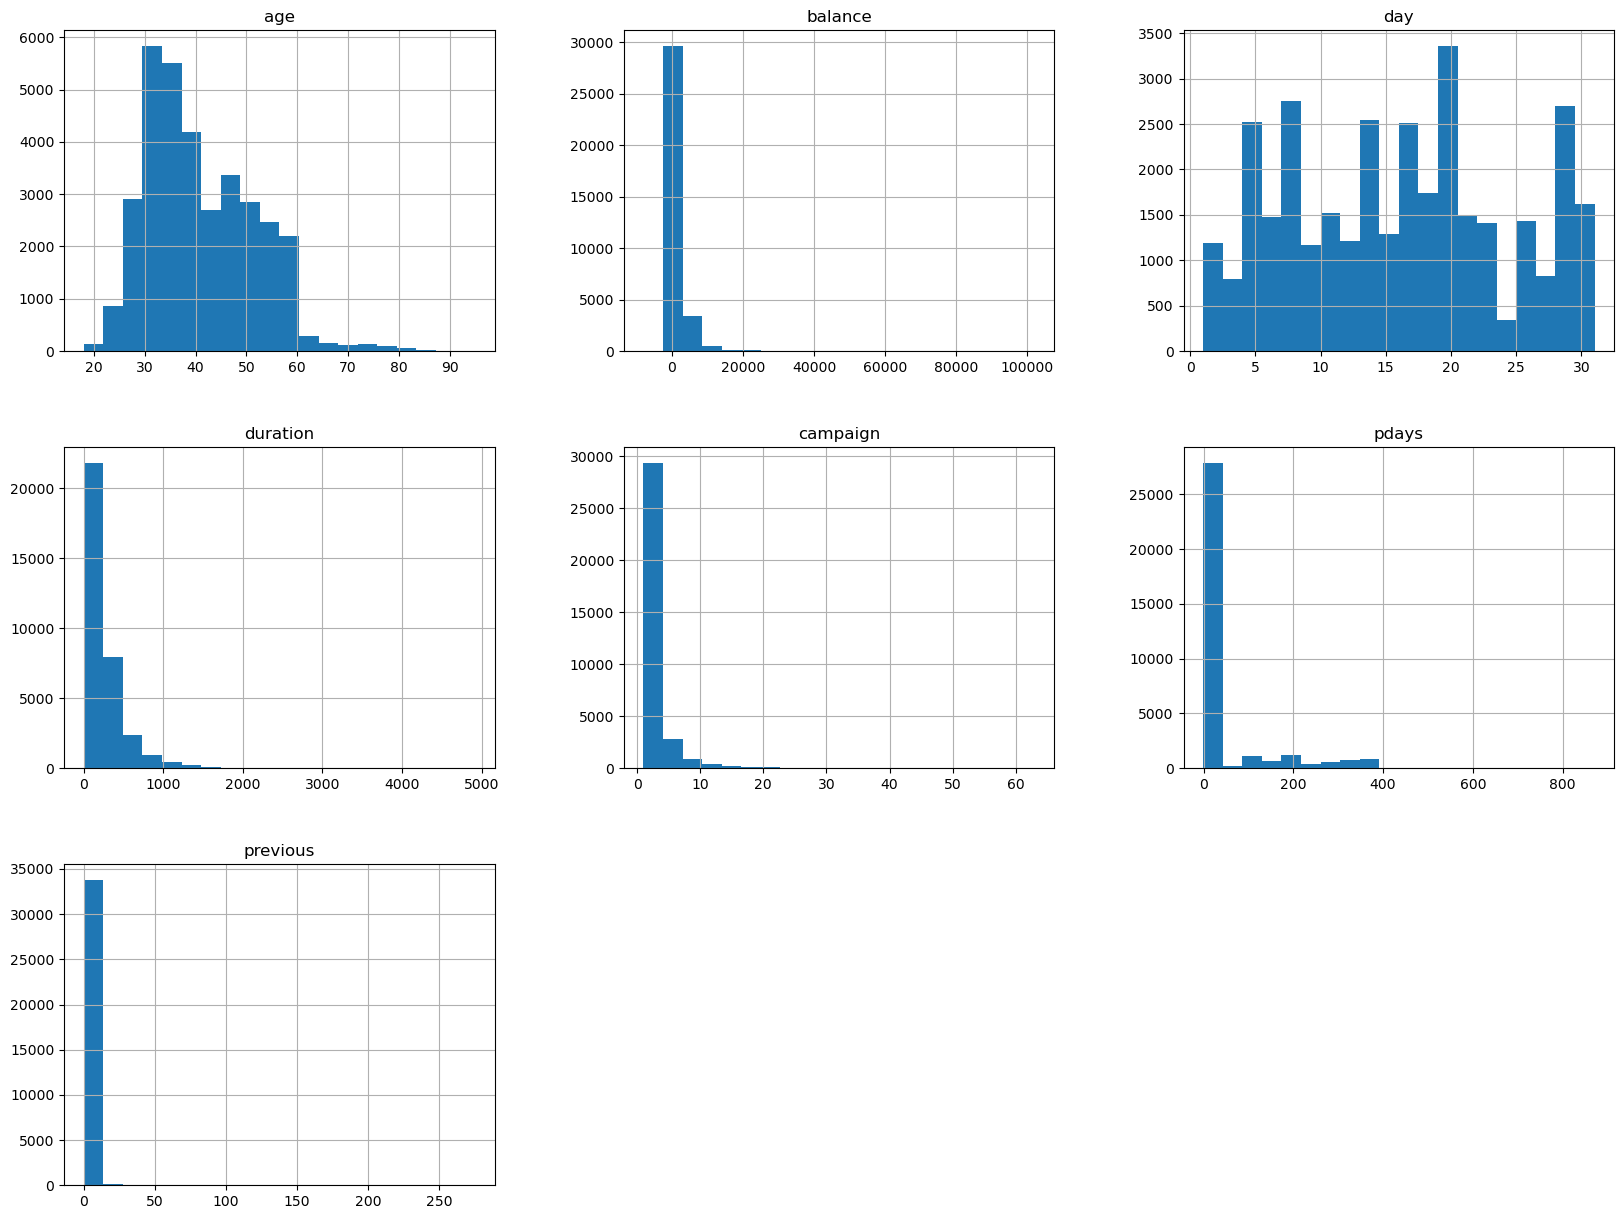

In [590]:
df.hist(bins=20,figsize=(20,15));

**Observations from above plot:**
1.  **Count of age group between 30 to 40 is the highest.**
2.  **0 and negative balance seems to be significantly high.**
3.  **75 percentile of clients were not contacted during campaign.**
4.  **75 percentile of  contacted  client during this campaign are new.**
5.  **Though 75 percentile of clients are contacted only 3 times, in extreme cases as much as 63 calls is made.**


**Viewing all unique values of Categorical features**

In [591]:
pd.set_option('display.max_colwidth', 0)
cat = []
for i in Catogrical_Features:
  categories_list = df[i].value_counts().index.to_list()
  cat.append([i, categories_list])
pd.DataFrame(cat, columns=["Column Name", "Categories"]).set_index("Column Name")

,Categories
Column Name,
job,"[blue-collar, management, technician, admin., services, retired, self-employed, entrepreneur, unemployed, housemaid, student, unknown]"
marital,"[married, single, divorced]"
education,"[secondary, tertiary, primary, unknown]"
default,"[no, yes]"
housing,"[yes, no]"
loan,"[no, yes]"
contact,"[cellular, unknown, telephone]"
month,"[may, jul, aug, jun, nov, apr, feb, jan, oct, sep, mar, dec]"
poutcome,"[unknown, failure, other, success]"


 **Observation:
job,education,contact and poutcome feature has "unknown" values. it's not feasible to remove or marking them as null and imputing them. to avoid model to learn wrongly lets assume it to be another category**

**Viewing number of values per category in each categorical feature.**

In [592]:
for i in Catogrical_Features:
  print(f"____{i}____")
  print(df[i].value_counts())

____job____
blue-collar      7250
management       7143
technician       5724
admin.           3860
services         3104
retired          1677
self-employed    1210
entrepreneur     1110
unemployed       981 
housemaid        934 
student          699 
unknown          216 
Name: job, dtype: int64
____marital____
married     20399
single      9601 
divorced    3908 
Name: marital, dtype: int64
____education____
secondary    17346
tertiary     10079
primary      5098 
unknown      1385 
Name: education, dtype: int64
____default____
no     33315
yes    593  
Name: default, dtype: int64
____housing____
yes    18916
no     14992
Name: housing, dtype: int64
____loan____
no     28472
yes    5436 
Name: loan, dtype: int64
____contact____
cellular     21994
unknown      9750 
telephone    2164 
Name: contact, dtype: int64
____month____
may    10308
jul    5124 
aug    4727 
jun    4004 
nov    2997 
apr    2198 
feb    2025 
jan    1048 
oct    525  
sep    432  
mar    351  
dec    169  
Nam

**Visualizing the same for better understanding**

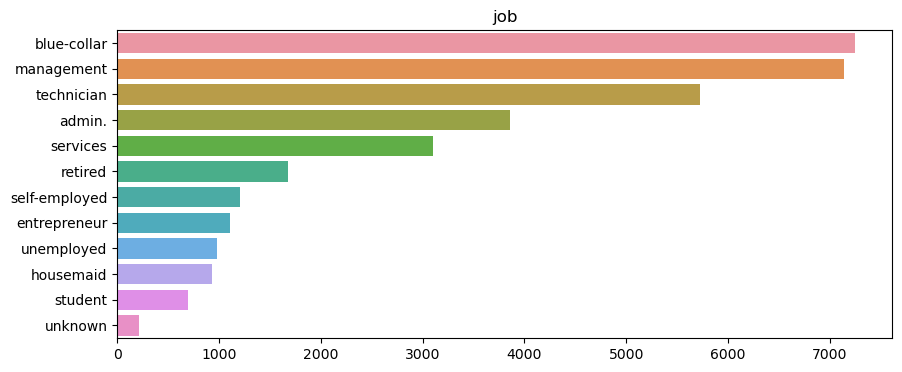

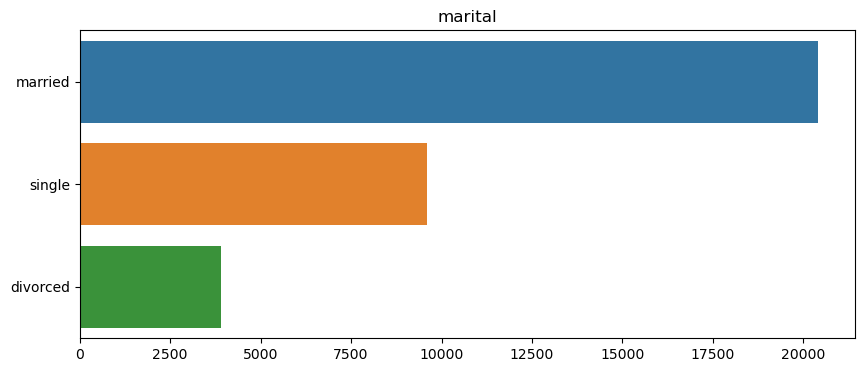

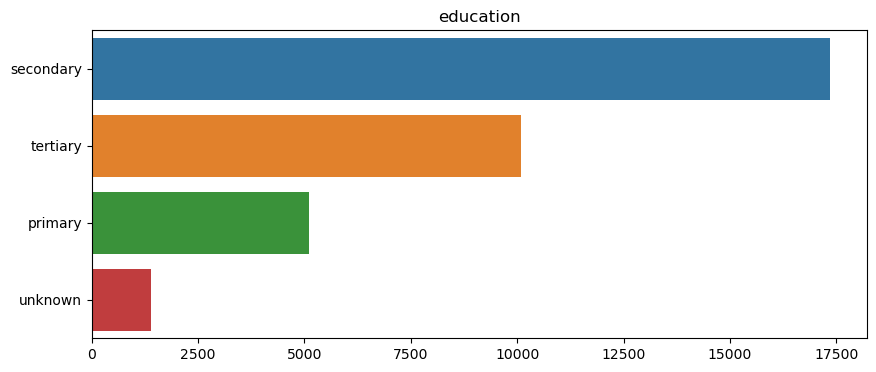

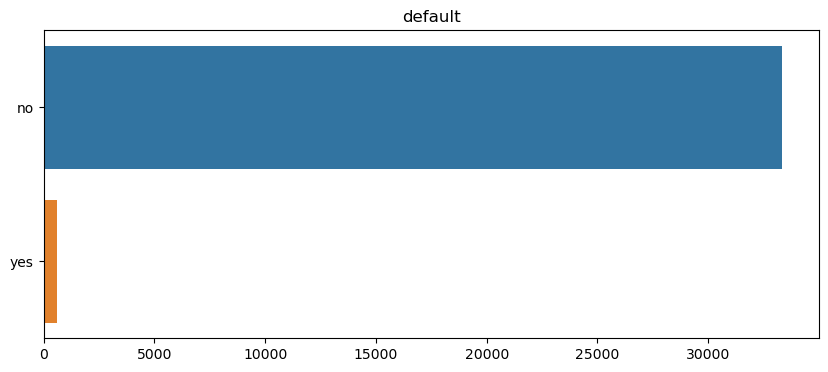

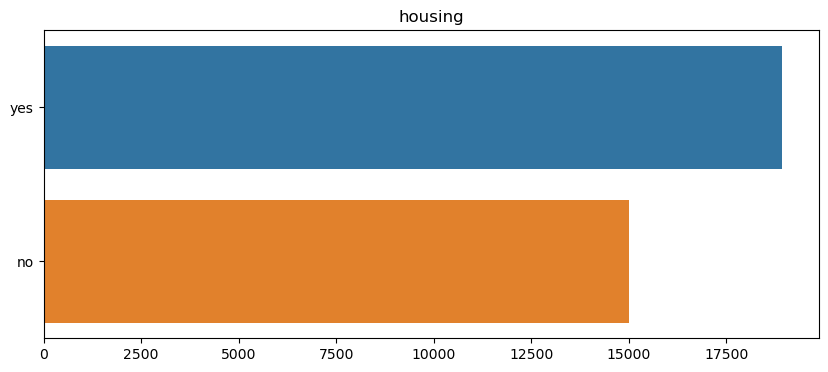

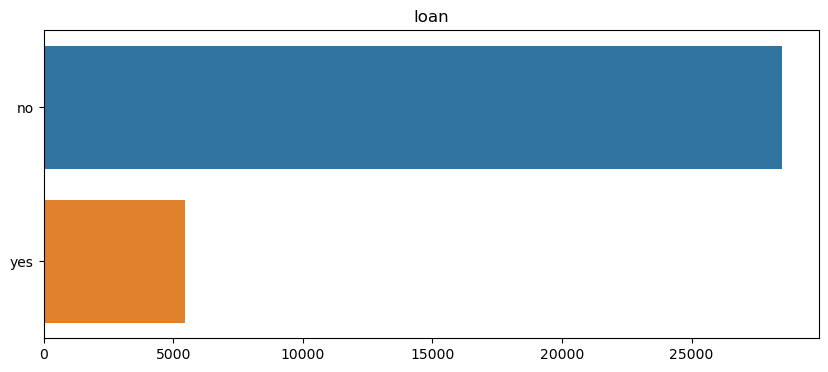

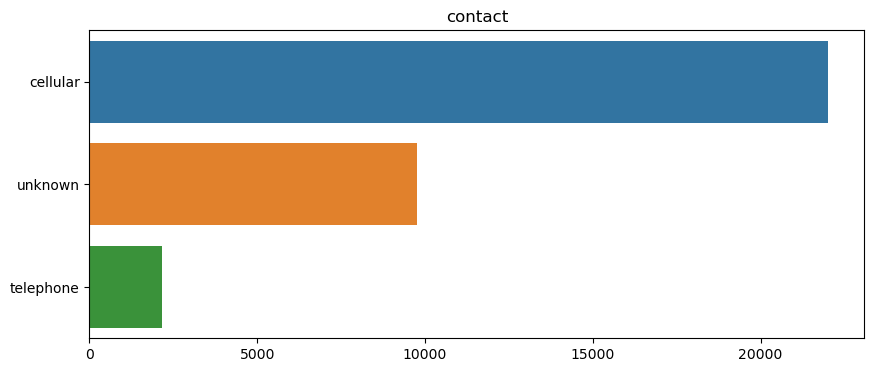

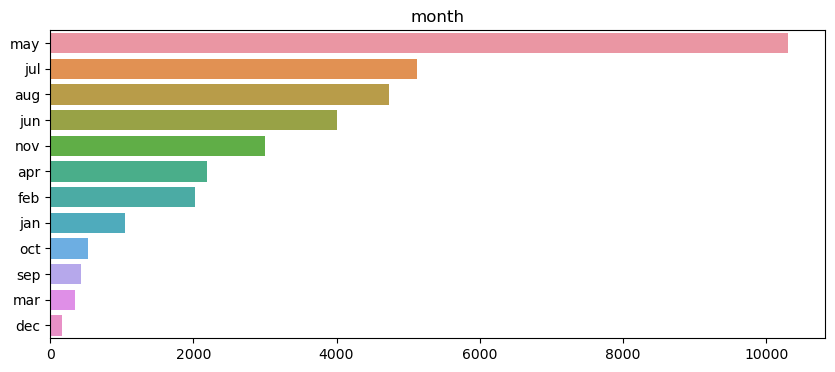

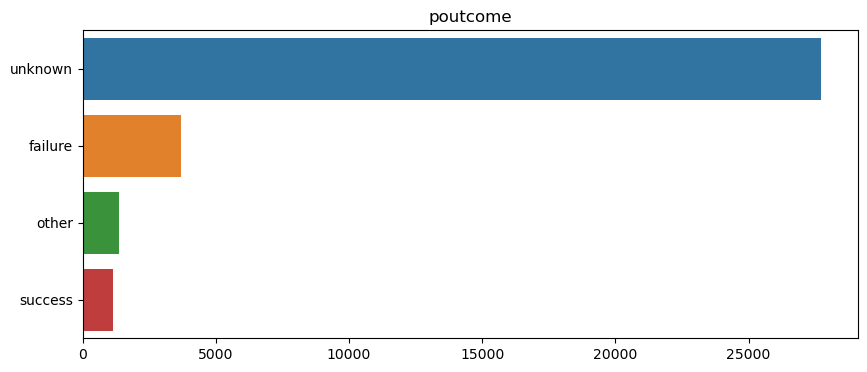

In [593]:
for i in Catogrical_Features:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[i].value_counts().values, y=df[i].value_counts().index)
    plt.title(i)

**Spliting the dataframe into 2 based on client subscribed for a term deposit or not.**

In [594]:
df_yes = df[df["y"] == "yes"]
df_no=df[df["y"]=="no"]

In [595]:
len(Catogrical_Features)

9

**Visualizing them side by side for better observations**

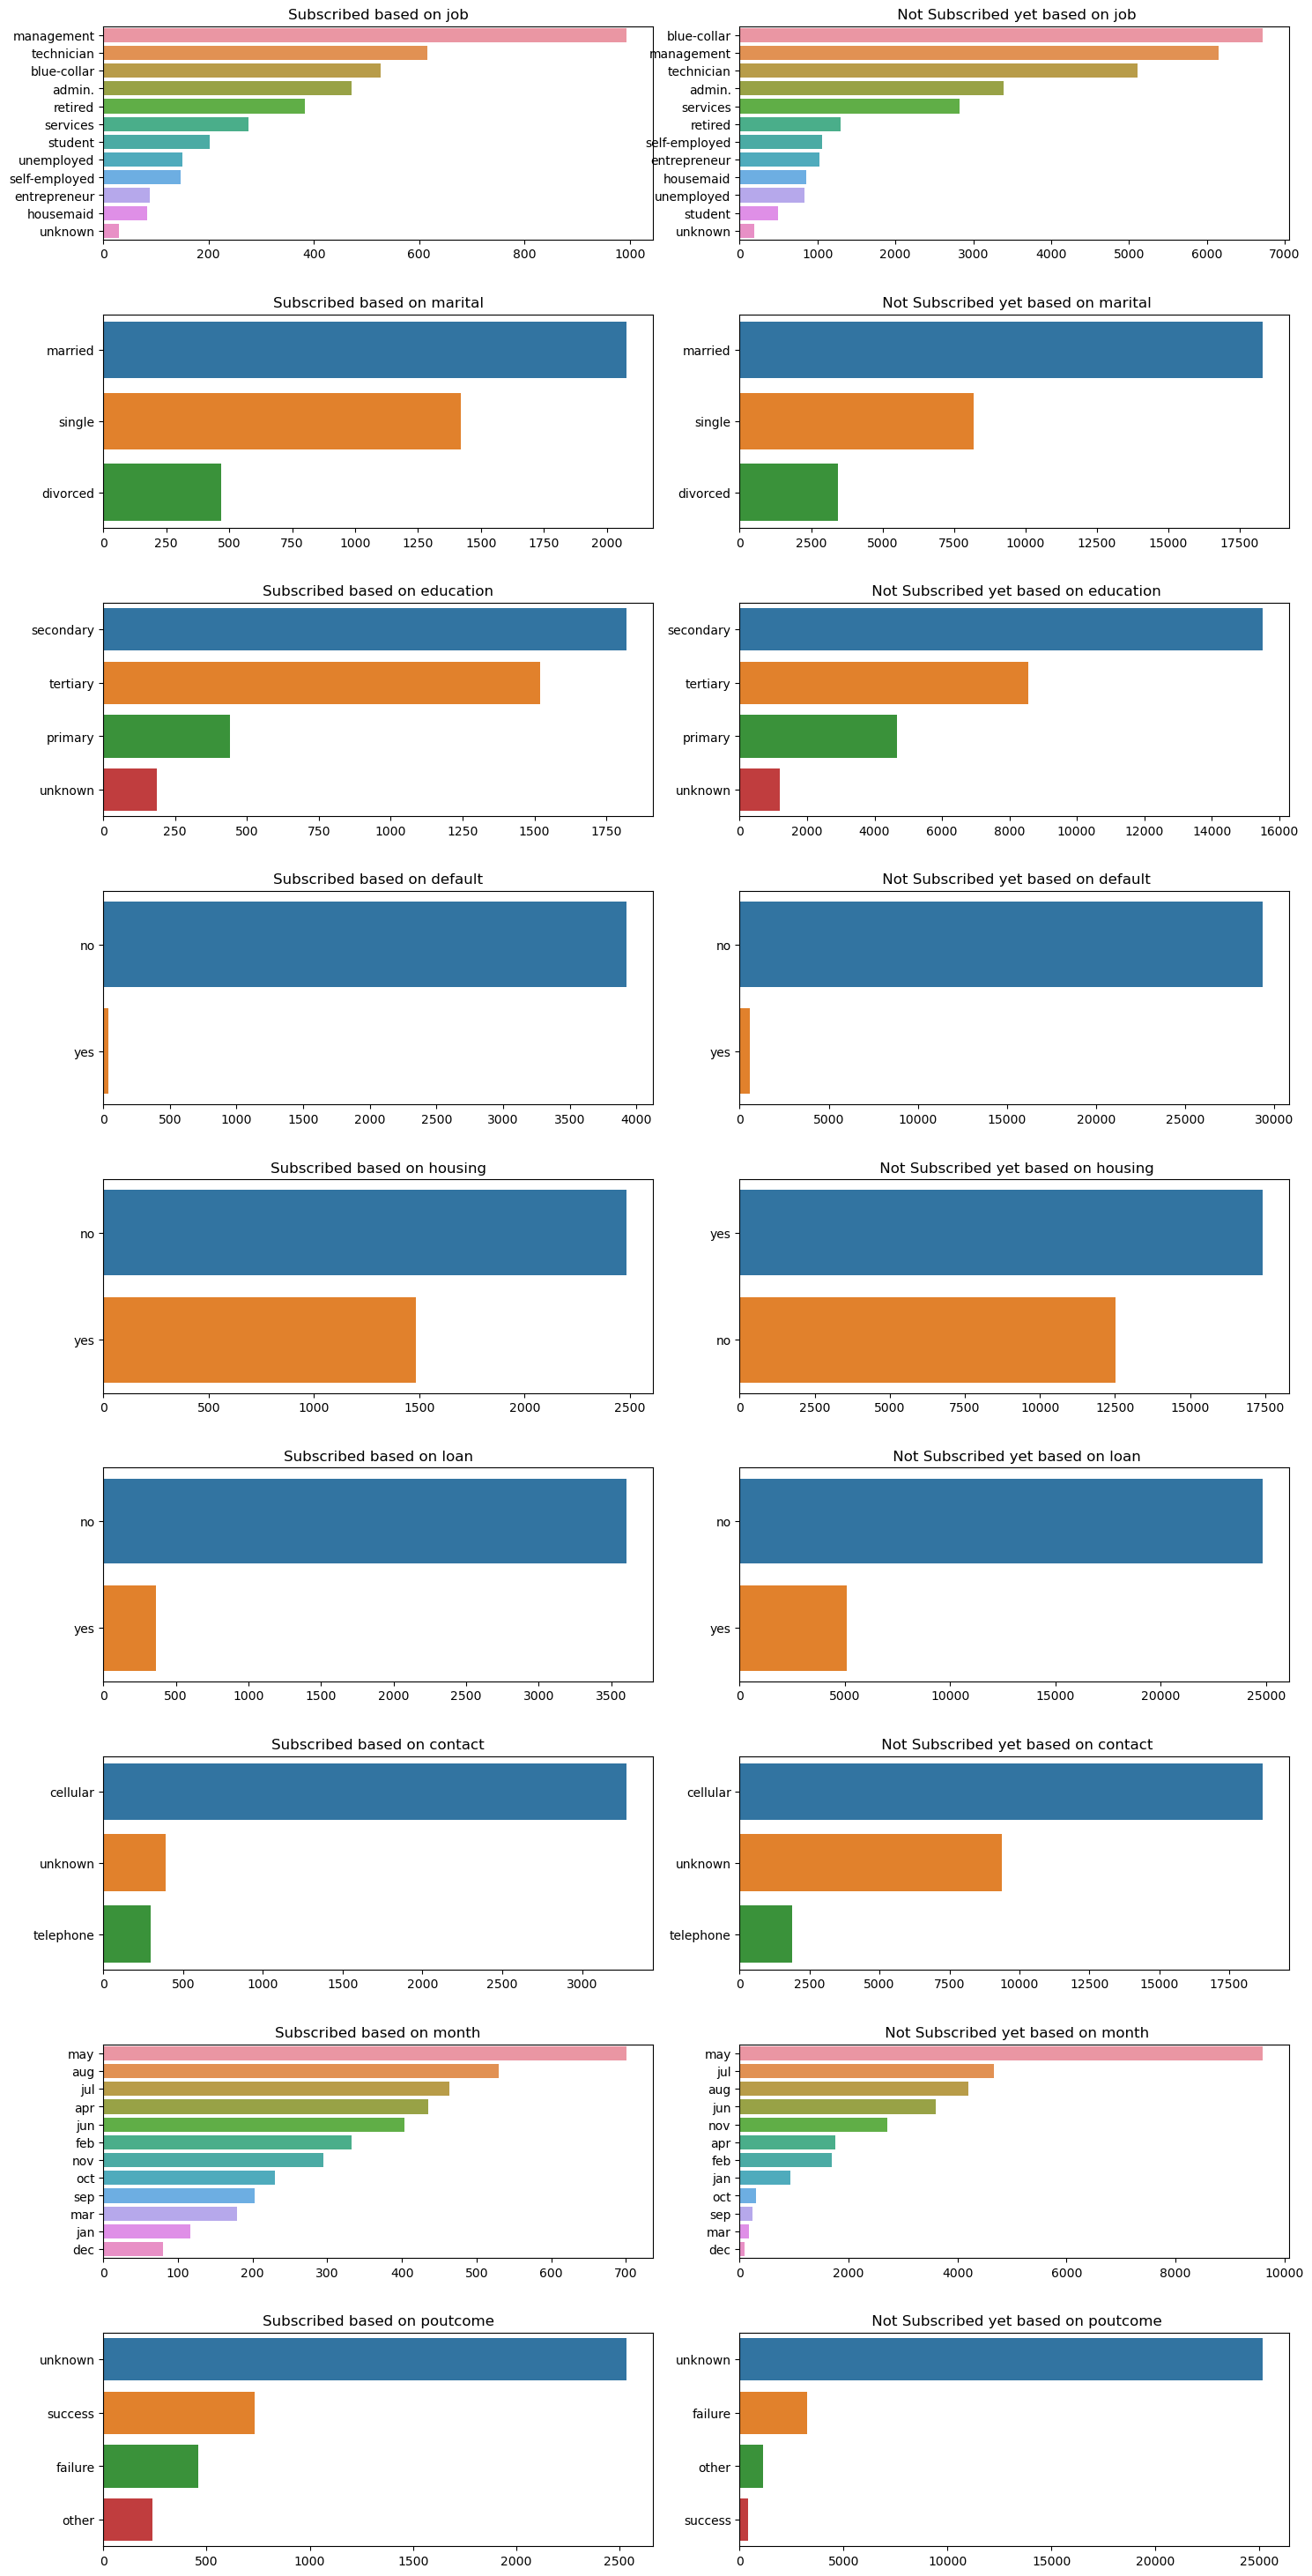

In [596]:
fig,ax=plt.subplots(9,2,figsize=(15,30))
fig.tight_layout(pad=4)
for i,j in enumerate(Catogrical_Features):
    sns.barplot(ax=ax[i,0],x=df_yes[j].value_counts().values,y= df_yes[j].value_counts().index)
    ax[i,0].set_title("Subscribed based on "+j)
    sns.barplot(ax=ax[i,1],x=df_no[j].value_counts().values,y= df_no[j].value_counts().index)
    ax[i,1].set_title(" Not Subscribed yet based on "+j)

**Observations:**
1.   **It can be noted that blue collar job clients who comes in top 3 of subscribed client list comes top in unsubscribed client list with significant number than subscribed.**
2.   **People with housing loan has not subscribed for term deposit which is understandable and not encourageable to avoid NPA.**
3.   **It can be seen that personal who dont have personal loan has still not opt for term deposit these clients can be considered for subscription.**
4.  **December,March,September months campaign count is minimum.**
5. **It can be seen the first month of the year January though the marketing campaigns is high the subscription result is No rather than yes.**
6.  **Previous marketing failure seems to be continuing as same can be seen in present campaign result from these clients.**


**Checking for Outliers**

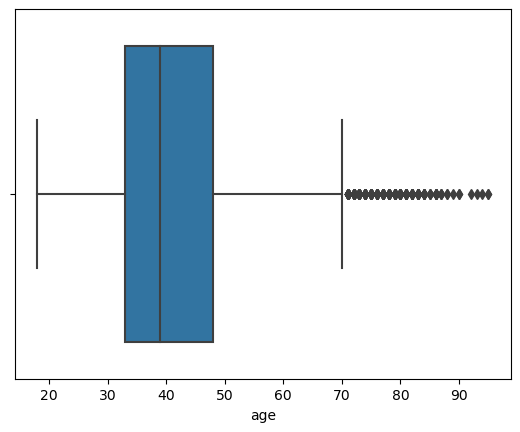

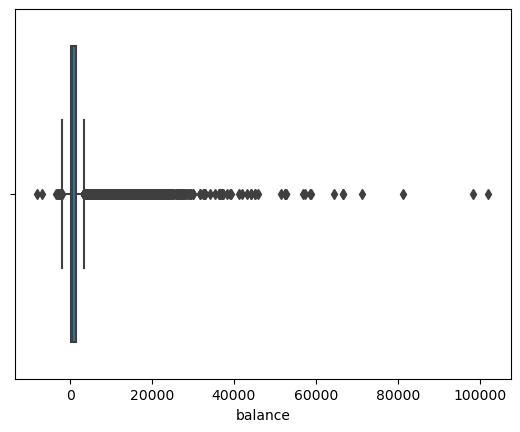

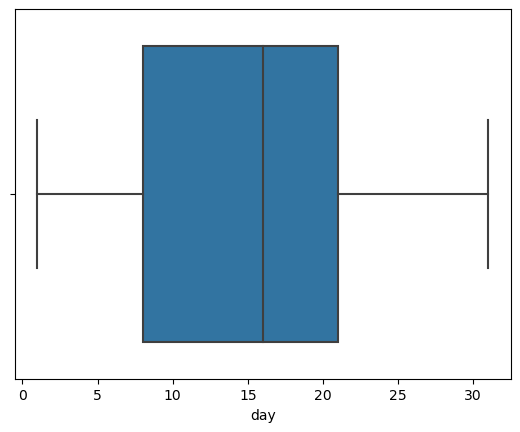

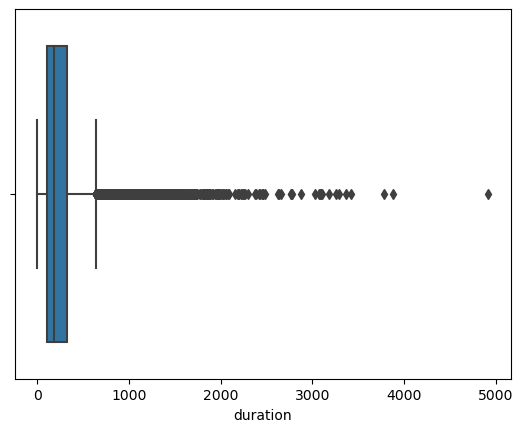

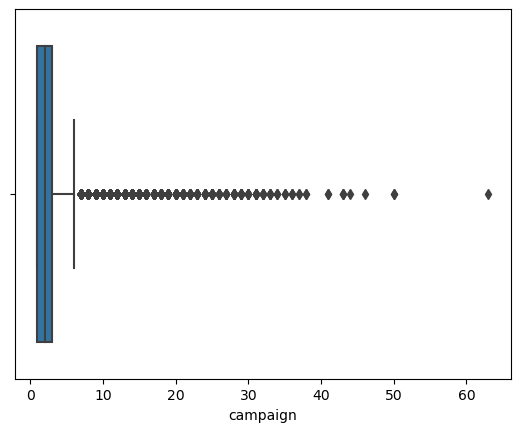

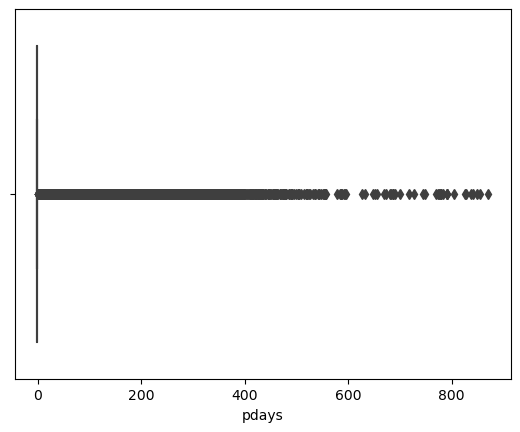

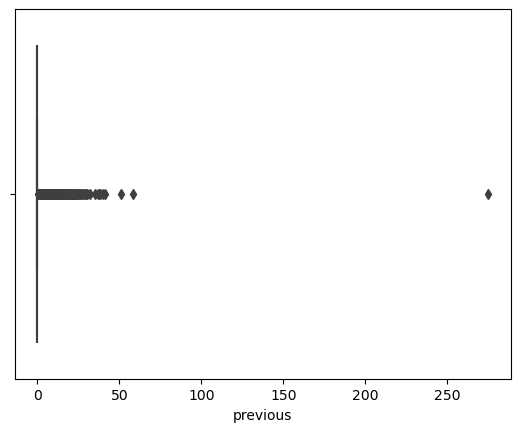

In [597]:
for i in Numerical_Features:
    sns.boxplot(df[i])
    plt.show();

**There seemed to be lots of outliers but since its banking data. data are not normally distributed**

**Observations:  
    1. Age is varient in a society so cann't be called outlier in real case scenario.  
    2. Client's bankbalance doesnt form pattern it varies from negative to exponentially high.  
    3. As each client is different. Call duration also varies.  
    4. Similarly some need to be called high number of times while campaigning.**

In [598]:
corr=df.corr()

**Correlation matrics is visualized using heatmap**

<AxesSubplot:>

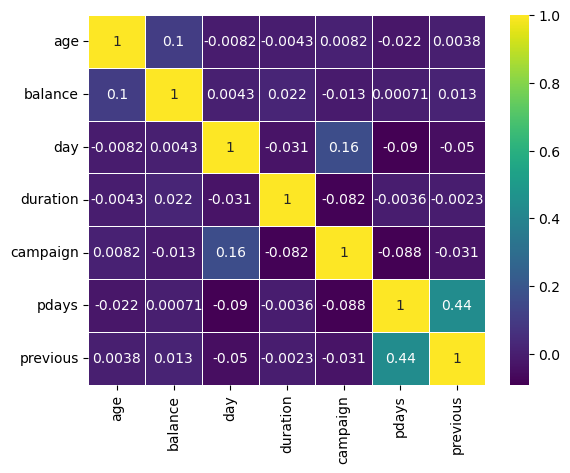

In [599]:
sns.heatmap(corr,annot=True,cmap='viridis',linewidths=0.5)
#This is representational as we don't have sufficient numerical data to generate feedback

**Analysing Target Column**

In [600]:
df.y.value_counts()

no     29941
yes    3967 
Name: y, dtype: int64

**Visualizing for better comparison dependant variables classes count**

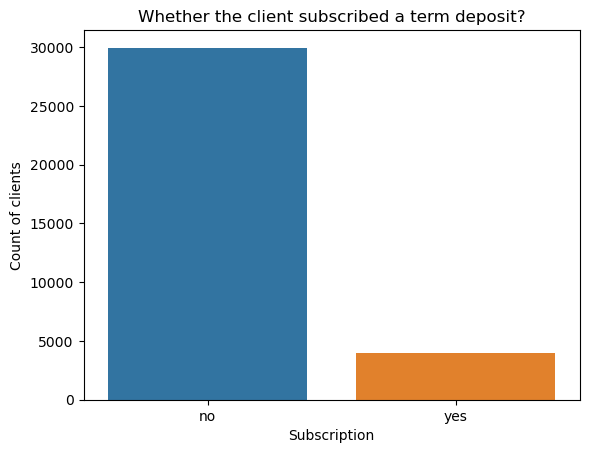

In [601]:
sns.countplot(x="y", data=df)
plt.title("Whether the client subscribed a term deposit?")
plt.ylabel("Count of clients")
plt.xlabel("Subscription");

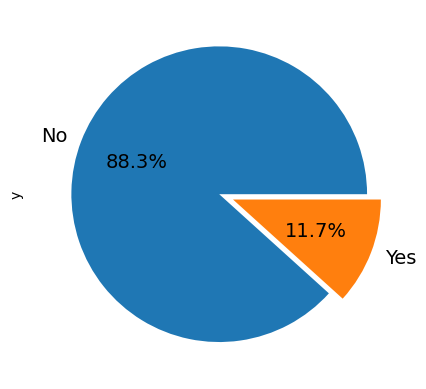

In [602]:
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%'
                                ,labels=["No","Yes"],fontsize=14);

**From Above we can see that the dataset in imbalanced. SMOTE imbalanced correction techniques to balance the data need to implemented to avoid bias towards the majority class.**

In [603]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


**Separating Features and Target columns from df dataframe**

In [604]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [605]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.1+ MB


**Transform output variable from categorical to numerical**

In [606]:
y.replace(to_replace = ["yes", "no"], value = [1,0], inplace = True)

**Spliting Data into Training Set and Validation Set**

In [607]:
x_train, x_val, y_train, y_val = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

*Stratified split is done so that both class are correctly represented in training and validation set*

**Using ColumnTransformer to OneHotEncode Catogrical values**

In [608]:
transformer=ColumnTransformer( transformers=[('OneHot',OneHotEncoder(sparse = False,drop ='first',
                                                                     handle_unknown="ignore"),
                                              Catogrical_Features)],remainder="passthrough")

**PCA object for pipeline**

In [609]:
PCA_object=PCA(n_components=0.98)

**Smote object**

In [610]:
SMOTE_object=SMOTE()

**Normalization object**

In [611]:
MinMax_scaling=MinMaxScaler()

**Standardization object**

In [612]:
Standard_scaling=StandardScaler()

**Extreme Gradient Boosting algorithm object for testing**

In [613]:
XGB = XGBClassifier(objective= 'binary:logistic')

**Test Pipeline**

In [614]:
test_pipeline=make_pipeline(transformer,PCA_object,SMOTE_object,Standard_scaling, LogisticRegression())

In [615]:
test_pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('pca', PCA(n_components=0.98)), ('smote', SMOTE()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [616]:
y_pred1=test_pipeline.predict(x_val)

**Test model Classification Report**

In [617]:
 print(classification_report(y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5989
           1       0.17      0.35      0.23       793

    accuracy                           0.72      6782
   macro avg       0.54      0.56      0.53      6782
weighted avg       0.82      0.72      0.76      6782



**By doing multiple runs it is noted that SMOTE is reducing the F1 score significantly so we will avoid in future. **

**Creating a  object for all 10 machine learning models**

In [618]:
classifiers=[LogisticRegression(),
             KNeighborsClassifier(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             SVC(),
             GaussianNB(),
             GradientBoostingClassifier(),
             AdaBoostClassifier(),
             XGBClassifier(),
             MLPClassifier()]
             

**Creating empty list for future appending usage**

In [619]:
Model=[]
Training_Time=[]
Prediction_Time=[]
Accuracy=[]
Precision=[]
Recall=[]
Score=[]

**Iterating through all models and giving it into imblearn pipeline containing Onehotencoding,PCA dimension reduction,Data Balancing using SMOTE for training dataset,Scaling using standardisation and fit&predict model.**

**Appending Training time,Prediction time,Accuracy Score,Precision Score,Recall Score and F1 Score**

**And Displaying the Classification report for each model.**

In [620]:
for model in classifiers:
  pipeline=make_pipeline(transformer,PCA(),SMOTE_object,Standard_scaling, model)
  start = time()
  pipeline.fit(x_train,y_train)
  train_time = time() - start
  start = time()
  y_pred=pipeline.predict(x_val)
  predict_time = time()-start  
  print(model)
  print(classification_report(y_val,y_pred))
  print("*"*55) 
  Model.append(model)
  score=f1_score(y_val,y_pred)
  Score.append(score)
  Training_Time.append(train_time)
  Prediction_Time.append(predict_time)
  accuracy=accuracy_score(y_val,y_pred)
  Accuracy.append(accuracy)
  precision=precision_score(y_val,y_pred)
  Precision.append(precision)
  recall=recall_score(y_val,y_pred)
  Recall.append(recall)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5989
           1       0.41      0.78      0.54       793

    accuracy                           0.84      6782
   macro avg       0.69      0.82      0.72      6782
weighted avg       0.90      0.84      0.86      6782

*******************************************************
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5989
           1       0.39      0.56      0.46       793

    accuracy                           0.85      6782
   macro avg       0.66      0.72      0.69      6782
weighted avg       0.87      0.85      0.86      6782

*******************************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5989
           1       0.40      0.56      0.47       793

 

**Display the each model's metrics in a structured format**

In [621]:
Report=pd.DataFrame({"Model":["LogisticRegression",
             "KNeighborsClassifier",
             "DecisionTreeClassifier",
             "RandomForestClassifier",
             "Support Vector Classifier",
             "Gaussian Naive Bayes",
             "GradientBoostingClassifier",
             "AdaBoostClassifier",
             "XGBClassifier","MLPClassifier"],
"Training_Time":Training_Time,
"Prediction_Time":Prediction_Time,
"Accuracy":Accuracy,
"Precision":Precision,
"Recall":Recall,
"F1_Score":Score})

Report.sort_values(by = ['F1_Score', 'Prediction_Time'], ascending = [False, True]).set_index(np.arange(1,11))

,Model,Training_Time,Prediction_Time,Accuracy,Precision,Recall,F1_Score
1,RandomForestClassifier,33.354490,0.130991,0.900767,0.565217,0.655738,0.607122
2,XGBClassifier,5.518224,0.037965,0.895459,0.544968,0.641866,0.589461
3,Support Vector Classifier,72.771568,8.327978,0.901799,0.577157,0.598991,0.587871
4,GradientBoostingClassifier,69.491289,0.047808,0.864642,0.455705,0.810845,0.583485
5,LogisticRegression,0.576351,0.027919,0.843999,0.411960,0.781841,0.539600
6,AdaBoostClassifier,14.702419,0.139719,0.849897,0.416851,0.711223,0.525629
7,MLPClassifier,33.397384,0.031574,0.886759,0.515489,0.524590,0.520000
8,DecisionTreeClassifier,5.218018,0.026724,0.850781,0.401084,0.559899,0.467368
9,KNeighborsClassifier,0.489846,8.609226,0.846800,0.391534,0.559899,0.460820
10,Gaussian Naive Bayes,0.448481,0.031608,0.828074,0.360925,0.610340,0.453608


**Among all 9 Models. RandomForest performed best in F1 Score and Extreme gradiant boosting also performed well with less prediction time. so we will cross validate & hypertune these 2 model and gets best performer in them for Final Model building. 

**SVM is not considered for this as the prediction time is very high.and it's sensitive to outliers which is the case for banking dataset.**

In [622]:
classifiers[8]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [623]:
classifiers[3]

RandomForestClassifier()

**Making Pipeline for XGBoost and RandomForest**

In [624]:
XGB_pipeline=make_pipeline(transformer,PCA(),SMOTE_object,Standard_scaling, XGB)

In [625]:
RF = RandomForestClassifier(random_state=42)
RF_pipeline=make_pipeline(transformer,PCA(),SMOTE_object,Standard_scaling, RF)

**Cross Validation for XGBoost and RandomForest**

In [626]:
for model in RF_pipeline,XGB_pipeline:
  print(model)
  print("\nThe Average F1 Score of 5 cv is ",(cross_val_score(model, x_train, y_train, cv=5,scoring='f1')).mean())
  print("\n\n")

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('pca', PCA()), ('smote', SMOTE()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

The Average F1 Score of 5 cv is  0.583791329255348



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[

*Cross Validation is done to ensure model evaluation is not because of random sampling*

**HyperParameter Tuning for XGBoost and RandomForest**

In [627]:
XGB_hyperparameters = {
  "xgbclassifier__max_depth": [6,8,10],
  "xgbclassifier__n_estimators": [100,200,220],
  "xgbclassifier__learning_rate": [0.01,0.03,0.1]
}

*Choose these hyperparameters after multiple tuning.*

In [628]:
XGB_grid_search = GridSearchCV(
    estimator=XGB_pipeline,
    param_grid=XGB_hyperparameters,
    scoring = "f1",
    n_jobs = -1,
    cv = 5,
    verbose=True
)

In [629]:
RF_hyperparameters = { 
    'randomforestclassifier__n_estimators': [180,200,220],
    'randomforestclassifier__max_depth' : [12,15,20],
    'randomforestclassifier__criterion' :['gini']
}


*Choose these hyperparameters after multiple tuning.Gini gave better F1 score than entropy*

In [630]:
RF_grid_search = GridSearchCV(
    estimator=RF_pipeline,
    param_grid=RF_hyperparameters,
    scoring = "f1",
    n_jobs = -1,
    cv = 5,
    verbose=True
)

In [631]:
XGB_grid_search.fit(x_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                                       ('pca', PCA()), ('smote', SMOTE()),
                                       ('standard...
                                                      max_depth=None,
                                 

In [632]:
RF_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                                       ('pca', PCA()), ('smote', SMOTE()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
             

**Best Hyperparameters and Final Model F1 Score**

In [633]:
print(f"XGB Best Parameters are: \n\n{XGB_grid_search.best_params_}")   

XGB Best Parameters are: 

{'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 8, 'xgbclassifier__n_estimators': 220}


In [634]:
print(f"RandomForest Best Parameters are: \n\n{RF_grid_search.best_params_}") 

RandomForest Best Parameters are: 

{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 200}


In [635]:
print(f"Best F1score for XGB is {XGB_grid_search.best_score_} and RF is {RF_grid_search.best_score_}")

Best F1score for XGB is 0.610381154048524 and RF is 0.6074525378981585


**Storing best hyperparameter model in best model object**

In [636]:
best_model=XGB_grid_search.best_estimator_

In [637]:
best_model.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('pca', PCA()), ('smote', SMOTE()),
                ('standardscaler', StandardScaler()),
                ('...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_th

**Saving built model into pickle file**

In [638]:
jlib_file = "Term_Deposit.pkl"
joblib.dump(best_model,jlib_file)

['Term_Deposit.pkl']

**Loading test dataset**

In [639]:
test_df=pd.read_csv("test.csv")

**Loading saved model**

In [640]:
Saved_Model = joblib.load("Term_Deposit.pkl")

**Predicting based on best_model and storing it in test_pred**

In [641]:
test_pred = Saved_Model.predict(test_df)

**Converting into Dataframe for conversion of numerical output to equivalent categorical output**

In [642]:
test_pred=pd.DataFrame(test_pred)

In [643]:
test_pred.replace(to_replace=[1,0],value=["yes","no"],inplace=True)

**Creating a Dataframe as submission csv file shared with exact column names as submission.csv file with serial numbers upto 11303**

In [644]:
submission=pd.DataFrame({"Serial_no":np.arange(1,11304),"pred":test_pred[0]})

**Exporting the dataframe as csv file for submission**

In [645]:
submission.to_csv('Imarticus-Anand-Submission.csv',index=False)